## Carbon Credits

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('Emission Factor DB.csv')
df.head()

,Source,Unit,Emission Factor,Ref,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Grid,tCO2e./kWh,0.000820,CEA,NaN,NaN,NaN,NaN,NaN
1,Petrol,tCO2e./L,0.002353,India GHG,NaN,NaN,NaN,NaN,NaN
2,Diesel,tCO2e./L,0.002640,India GHG,NaN,NaN,NaN,NaN,NaN
3,Kerosene,tCO2e./L,0.002670,EPA,NaN,NaN,NaN,NaN,NaN
4,Rail,tCO2e./Pax-Km,0.000008,India GHG,NaN,NaN,NaN,NaN,NaN


In [2]:
df = df.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis = 1)

In [3]:
df

,Source,Unit,Emission Factor,Ref
0,Grid,tCO2e./kWh,0.000820,CEA
1,Petrol,tCO2e./L,0.002353,India GHG
2,Diesel,tCO2e./L,0.002640,India GHG
3,Kerosene,tCO2e./L,0.002670,EPA
4,Rail,tCO2e./Pax-Km,0.000008,India GHG
5,Air,tCO2e./Pax-Km,0.000121,India GHG
6,LPG,tCO2e./Kg,0.003010,EPA
7,Auto - Petrol,KgCO2/Km,0.113500,India GHG
8,Auto - Diesel,KgCO2/Km,0.132200,India GHG
9,Auto - CNG,KgCO2/Km,0.107680,India GHG


In [7]:
## HouseHold
#Units consumed

Electricity = float(input("enter the amount of electricity consumed in a year in kWh : "))
LPG = float(input("enter the amount of LPG consumed in a year in nos cylinder : "))
Kerosene = float(input("enter the amount of Kerosene consumed in a year in Liter : "))
household_emissions = ['Grid','Kerosene','LPG']
H_emissions = []
for row in df.index:
    if df['Source'].iloc[row] == 'Grid':
        H_emissions.append((Electricity*df['Emission Factor'].iloc[row],df['Source'].iloc[row]))
    if df['Source'].iloc[row] == 'LPG':
        H_emissions.append((14.5*LPG*df['Emission Factor'].iloc[row],df['Source'].iloc[row]))
    if df['Source'].iloc[row] == 'Kerosene':
        H_emissions.append((Kerosene*df['Emission Factor'].iloc[row],df['Source'].iloc[row]))
Household_Emissions = pd.DataFrame(household_emissions, columns = ['Source'])
values = []
for row in Household_Emissions.index:
    if H_emissions[row][1] == Household_Emissions['Source'].iloc[row]:
        values.append(H_emissions[row][0])
Household_Emissions['Values(tCO2e.)'] = values
Household_Emissions

enter the amount of electricity consumed in a year in kWh : 125
enter the amount of LPG consumed in a year in nos cylinder : 12
enter the amount of Kerosene consumed in a year in Liter : 12


,Source,Values(tCO2e.)
0,Grid,0.10250
1,Kerosene,0.03204
2,LPG,0.52374


In [5]:

Household_Emissions.merge(df, how = 'inner')

,Source,Values(tCO2e.),Unit,Emission Factor,Ref
0,Grid,0.10250,tCO2e./kWh,0.00082,CEA
1,Kerosene,0.05607,tCO2e./L,0.00267,EPA
2,LPG,0.52374,tCO2e./Kg,0.00301,EPA


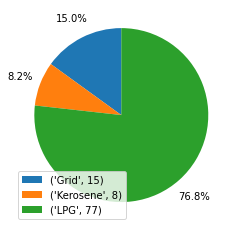

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 2.5 else ''
def pct(arr):
    percent = []
    for x in arr:
        x = x*100/np.sum(val)
        percent.append(x)
    return percent
val = np.array(Household_Emissions['Values(tCO2e.)'])
val_per = pct(val)
legend = []
for row in Household_Emissions.index:
    legend.append((Household_Emissions['Source'].iloc[row],round(val_per[row])))
plt.pie(val_per,startangle = 90, autopct=autopct_format,pctdistance=1.25)
plt.legend(legend,loc = 'best')
plt.show()


[('Grid', 15.465579655036048),
 ('Kerosene', 4.873300276822925),
 ('LPG', 79.66112006814103)]

0.6574599999999999

In [39]:
## Transportation
#Units consumed
